<a href="https://colab.research.google.com/github/fpinell/hands_on_python_for_ds/blob/main/Lecture_4_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands on Python for Data Science


### Master II Livello - Data Science and Statistical Learning (MD2SL) 2020-2021

#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2020/2021<br/>
June, 26 2021

# Outline

- Pytorch
- Neural Network (fully connected)
- CNN
- RNN


# Pytorch 

## Why ```pytorch```?



In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

#import for pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image, ImageFile



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# pytorch is available naturally on colab
# we can also use a gpu
# Go to Menu > Runtime > Change runtime.


import torch
# GPU available check 
print('GPU available check {}'.format(torch.cuda.is_available()))
print(torch.rand(2,2))

GPU available check False
tensor([[0.9722, 0.3772],
        [0.0426, 0.0083]])


## Tensors 

- A tensor is both a container for **numbers** and for a set of rules that define transformations between tensors producing a new tensor

- **Essentially?** A multidimensional array
- Every tensor has a rank
  - scalar --> rank 0 
  - array --> rank 1
  - $n \times n$ matrix --> rank 2

```python torch.rand(2,2)``` creates a rank 2 tensor with random values by using ```python torch.rand()``` 



### Operations with tensors

In [3]:
# we can create a tensor from lists
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
print(x)

tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])


In [4]:
# we can change an element in a tensor by using standard Python indexing

x[0][0] = 5
print(x) 

tensor([[5, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])


We can use special creation functions to generate particular types of tensors

- ```ones()``` generates tensors filled with 1s
- ```zeros()```  generates tensors filled with 1s

In [5]:
a = torch.zeros(2,2)
b = torch.ones(2,2)
print('First tensor\n {}'.format(a))
print('Second tensor\n {}'.format(b))

First tensor
 tensor([[0., 0.],
        [0., 0.]])
Second tensor
 tensor([[1., 1.],
        [1., 1.]])


We can perform standard mathematical operations with tensors, e.g. addind two tensors toegheter. 



In [6]:
a = torch.tensor([[1,2],[2,3]])
b = torch.tensor([[1,1],[1,1]])
print('Check the sum\n {}'.format(a+b))

Check the sum
 tensor([[2, 3],
        [3, 4]])


And if you have a tensor of rank 0, you can access out the value with the ```item()``` function

In [7]:
print('Value of the 1D tensor: {}'.format(torch.rand(1).item()))

Value of the 1D tensor: 0.029824137687683105


Tensors can live in the **CPU** or on the **GPU** and they can be copied between devices by usint the ```to()``` function:

In [8]:
cpu_tensor = torch.rand(2)
print('In which device is the tensor? {}'.format(cpu_tensor.device))

In which device is the tensor? cpu


In [ ]:
gpu_tensor = cpu_tensor.to('cuda')
print('In which device is the tensor? {}'.format(gpu_tensor.device))

Quite often we need to find the maximum item in a tensor, as well as the index that contains the maximum value (it may correspond to the class that the neural network has decided upon its final prediction). 

```max()``` and ```argmax()``` are the needed functions, then we can use ```item()``` to get the _standard_ Python value from a 1D tensor. 

In [10]:
a = torch.rand(2,2)
print(a)

print('Which is the max value? {}'.format(a.max()))
print('Which is the index of the max value: {}'.format(a.argmax()))
print('Get the values\n -max: {}\n -index: {}'.format(a.max().item(),a.argmax().item()))

tensor([[0.3183, 0.4572],
        [0.8339, 0.7504]])
Which is the max value? 0.8338645100593567
Which is the index of the max value: 2
Get the values
 -max: 0.8338645100593567
 -index: 2


Sometimes we need to change the type of a tensor

In [11]:
long_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
print('which is the type of long tensor? {}'.format(long_tensor.type()))

which is the type of long tensor? torch.LongTensor


In [14]:
float_tensor = long_tensor.to(dtype=torch.float32)
float_tensor_2 = long_tensor.type(torch.float64) #second method to change type
print('which is the type of long tensor? {}'.format(float_tensor.type()))
print('which is the type of long tensor? {}'.format(float_tensor_2.type()))

which is the type of long tensor? torch.FloatTensor
which is the type of long tensor? torch.DoubleTensor


If you remember in ```pandas``` we could perform operations of dataframes using the parameter ```in_place = True```. 

We could perform something similar on tensors. 

Functions can be applied _inplace_ if exists the original fuction with appended underscore '_'. 

Let see an example:

In [15]:
random_tensor = torch.rand(2,2)
new_random = random_tensor.log2()
print(random_tensor)
print(new_random)

tensor([[0.7740, 0.2640],
        [0.2119, 0.7053]])
tensor([[-0.3696, -1.9212],
        [-2.2385, -0.5036]])


In [16]:
print(random_tensor.log2_())

tensor([[-0.3696, -1.9212],
        [-2.2385, -0.5036]])


Some nice manipulation that can be done with tensors
- reshape / view
- column permutation
- slice a tensor

Let's try with a simple random tensor, and with the ```MINST``` dataset that is represented in numpy arrays of 784 elements

In [17]:
'''
reshape() function. It is really similar to numpy reshape function. There are a
lot of similarities between tensors and numpy operations/functions
'''

flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.reshape(1,28,28) #1 is the number of channels
print('Flat tensor shape {}'.format(flat_tensor.shape))
print('Flat tensor shape {}'.format(reshaped_tensor.shape))

'''
view() function. Same behaviour of reshape, the main difference is that the view 
changes if the original one is changed
'''
flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.view(1,28,28) #1 is the number of channels
print('Flat tensor shape {}'.format(flat_tensor.shape))
print('Flat tensor shape {}'.format(reshaped_tensor.shape))

'''
The reshaped tensor can't have a number of elements different than the original one
'''
flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.view(3,28,28)



Flat tensor shape torch.Size([784])
Flat tensor shape torch.Size([1, 28, 28])
Flat tensor shape torch.Size([784])
Flat tensor shape torch.Size([1, 28, 28])


RuntimeError: ignored

In [93]:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [19]:
print('shape of x train: {}'.format(X_train.shape))

shape of x train: (60000, 784)


In [103]:
'''
Let's create a tensor from the numpy arrays
'''
x_train_tensor,x_test_tensor = map(torch.FloatTensor, (X_train,X_test))
y_train_tensor,y_test_tensor = map(torch.LongTensor, (y_train,y_test))

# y_train_tensor = y_train_tensor.type(torch.LongTensor)
# y_test_tensor = y_test_tensor.type(torch.LongTensor)

In [104]:
print(x_train_tensor.shape,x_train_tensor.size())
x_train_tensor_reshaped = x_train_tensor.reshape([-1,28,28])

print(x_train_tensor_reshaped.size())


torch.Size([60000, 784]) torch.Size([60000, 784])
torch.Size([60000, 28, 28])


Dimensions permutations. The order of the "columns" is not the one useful for our tasks so we need to change the order. 
For instance, images are stored as ```[height, width, channel]``` tensors, but PyTorch prefers to dela with these in a ```[channel, height, width ]```

```
permute() 
```

In [22]:
hwc_tensor = torch.rand(643,232,9)
chw_tensor = hwc_tensor.permute(2,0,1)
print('Shape of hwc tensor {}',hwc_tensor.shape)
print('Shape of chw tensor {}',chw_tensor.shape)

Shape of hwc tensor {} torch.Size([643, 232, 9])
Shape of chw tensor {} torch.Size([9, 643, 232])


Slice on tensors to access certain elements of the data structrure

the shape is torch.Size([60000, 28, 28])
the shape of the cropped tensor is torch.Size([60000, 10, 28])


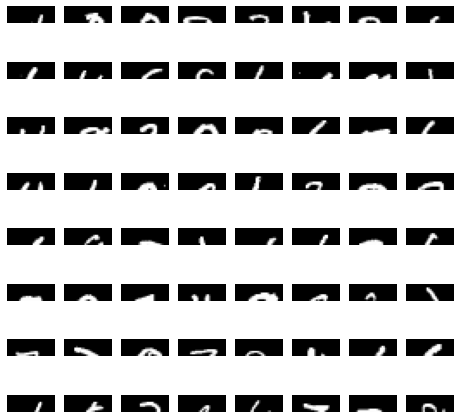

In [24]:
'''
Take the ten first lines for all the images
'''

print('the shape is {}'.format(x_train_tensor_reshaped.size()))

selected_part = x_train_tensor_reshaped[:,:10,:]

print('the shape of the cropped tensor is {}'.format(selected_part.size()))

fig, axes = plt.subplots(8,8,figsize=(8,8))
for i in range(8):
    for j in range(8):
        num_index = np.random.randint(len(selected_part))
        axes[i,j].imshow(selected_part[num_index].numpy(), cmap="gray")
        axes[i,j].axis("off")
plt.show() 

# Our first Neural Network in this class :-) 

- prepare the data for pytorch ```Dataset``` and ```DataLoader```
- create the network, loss, optimizer
- training 


```Dataset``` and ```DataLoader``` are two classes used to create the data in the format needed for pytorch and a method to push the data into the network

In [105]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

batch_size = 32 
train_ds = TensorDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(
    train_ds, batch_size=batch_size, shuffle=True)

test_ds = TensorDataset(x_test_tensor, y_test_tensor)
test_dl = DataLoader(test_ds, batch_size=batch_size)


The definition of a network uses the ```nn.Module``` of pytorch. 

```Linear``` defines the structure of each layer
```forward``` defines how the data should flow across the different layers of the network
```relu``` is the activation function

For each layer we define the size of the input and the output.
For instance, the first layer takes in input the same shape of the MINST images. Then, it passes the dato to a 200 nodes.

The latest layer returns an output equal to the number of classes. 

To understand which is the predicted class we need to take the ```argmax()``` of the output, such as the index of max score assigned to each instance by the network. 

In [106]:


class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 50)
        self.fc3 = nn.Linear(50,10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [107]:
'''
create an instance of the network
'''
simplenet = SimpleNet()

In [108]:
'''
Definition of an optimizer, in this case we select the Adam optimizer
Another possible optimizer is the SGD that is possibile to select from 
the same class optim
'''
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)
optimizer_regr = optim.SGD(simplenet.parameters(),lr=0.0001)

In [109]:
'''
And then, we need a definition of the loss. 
Also in this case, we can select one of those made available by pytorch
For regression, for instance we could select the MSELoss
'''
loss = nn.CrossEntropyLoss()
loss_regression = nn.MSELoss()

In [110]:
'''
Let's put everything together. 
The network, the optimizer and the loss inside a training loop, using the DataLoader
objects that we have already created.
'''

'''
Note: model.train() --> the model is set on training mode, where the weights and biases 
are adjusted using the training instance passed in batches.
'''


'''
Note: model.eval() --> when we evaluate the model on the validation set.
'''

def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad() # clear gradients for next train
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward() # backpropagation, compute gradients
            optimizer.step() # apply gradients
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)
        
        with torch.no_grad():
          model.eval()
          num_correct = 0 
          num_examples = 0
          for batch in val_loader:
              inputs, targets = batch
              inputs = inputs.to(device)
              output = model(inputs)
              targets = targets.to(device)
              loss = loss_fn(output,targets) 
              valid_loss += loss.data.item() * inputs.size(0)
              correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
              num_correct += torch.sum(correct).item()
              num_examples += correct.shape[0]
          valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.4f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

In [111]:
train(simplenet, optimizer,torch.nn.CrossEntropyLoss(), train_dl,test_dl, epochs=5)

Epoch: 1, Training Loss: 0.3027, Validation Loss: 0.2243, accuracy = 0.9425
Epoch: 2, Training Loss: 0.1541, Validation Loss: 0.1491, accuracy = 0.9593
Epoch: 3, Training Loss: 0.1259, Validation Loss: 0.1501, accuracy = 0.9587
Epoch: 4, Training Loss: 0.1074, Validation Loss: 0.1291, accuracy = 0.9642
Epoch: 5, Training Loss: 0.1002, Validation Loss: 0.1369, accuracy = 0.9636


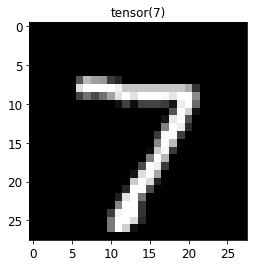

tensor([-16.6935,   1.7748,   0.3077,  -5.6482,   4.1558, -15.3938, -12.3336,
         16.4264,  -8.3418,   5.9741])
tensor(16.4264)
tensor(7)


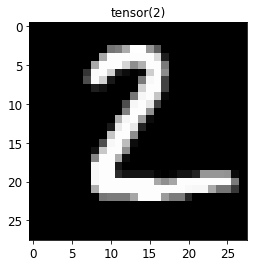

tensor([ 2.4362,  7.8885, 16.6994,  8.1185, -4.6292,  1.5054, -1.8027, 12.1839,
         8.1004,  1.5470])
tensor(16.6994)
tensor(2)


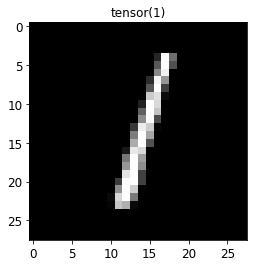

tensor([-14.2879,   8.1767,  -8.8325, -11.9655,  -2.3059,  -7.6807,  -1.1791,
         -4.8771,  -6.0319,  -6.8280])
tensor(8.1767)
tensor(1)


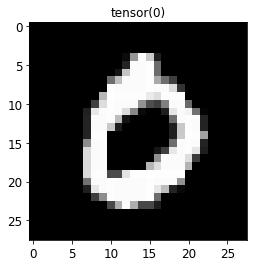

tensor([15.3473, -9.8782,  3.2870, -0.3937, -3.9611,  2.1514,  2.5896,  2.7026,
         2.7978,  6.4149])
tensor(15.3473)
tensor(0)


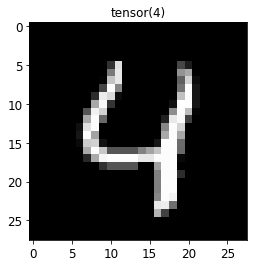

tensor([ 4.5215, -0.0826,  1.8459,  6.7406, 31.2656,  2.9088,  4.3603,  2.6171,
         5.5043, 12.0250])
tensor(31.2656)
tensor(4)


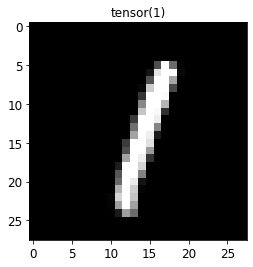

tensor([-17.8686,  10.1971, -11.0648, -14.9633,  -2.7337,  -9.7697,  -1.5767,
         -6.0219,  -7.8159,  -8.5007])
tensor(10.1971)
tensor(1)


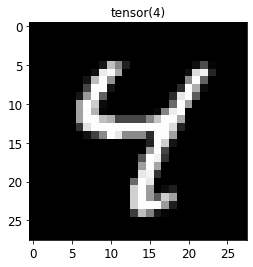

tensor([ 8.5991, -0.5816,  4.7115,  6.1837, 24.3060,  4.1101,  3.5331,  3.3764,
        10.3448, 11.9650])
tensor(24.3060)
tensor(4)


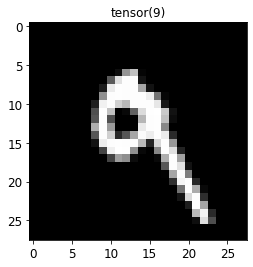

tensor([-7.5638,  0.5907,  0.4711,  9.3489, 10.7610,  4.2414, -3.5449,  5.7649,
         6.0918, 15.7816])
tensor(15.7816)
tensor(9)


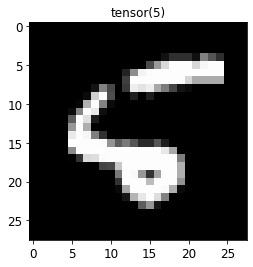

tensor([-3.8468,  3.8982, -3.1529,  5.8221,  6.2531, 16.8624, 10.4646, -9.2088,
         8.8772,  9.7953])
tensor(16.8624)
tensor(5)


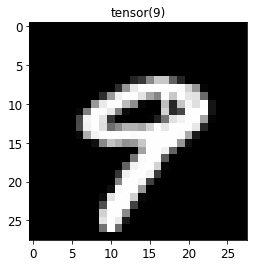

tensor([-2.3980, -6.3030,  2.6437, 12.0809, 13.3688,  3.5376, -5.0858, 12.7361,
         9.0327, 26.4611])
tensor(26.4611)
tensor(9)


In [112]:
with torch.no_grad():
  simplenet.eval()
  for i in range(10):
    plt.imshow(x_test_tensor[i].reshape((28,28)), cmap="gray")
    plt.title(y_test_tensor[i])
    plt.show()
    print(simplenet(x_test_tensor[i].float()))
    print(simplenet(x_test_tensor[i].float()).max())
    print(simplenet(x_test_tensor[i].float()).argmax())

In [ ]:
def find_lr(model, loss_fn, optimizer, train_loader, init_value=1e-8, final_value=10.0, device="cpu"):
    number_in_epoch = len(train_loader) - 1
    update_step = (final_value / init_value) ** (1 / number_in_epoch)
    lr = init_value
    optimizer.param_groups[0]["lr"] = lr
    best_loss = 0.0
    batch_num = 0
    losses = []
    log_lrs = []
    for data in train_loader:
        batch_num += 1
        inputs, targets = data
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)

        # Crash out if loss explodes

        if batch_num > 1 and loss > 4 * best_loss:
            if(len(log_lrs) > 20):
                return log_lrs[10:-5], losses[10:-5]
            else:
                return log_lrs, losses

        # Record the best loss

        if loss < best_loss or batch_num == 1:
            best_loss = loss

        # Store the values
        losses.append(loss.item())
        log_lrs.append((lr))

        # Do the backward pass and optimize

        loss.backward()
        optimizer.step()

        # Update the lr for the next step and store

        lr *= update_step
        optimizer.param_groups[0]["lr"] = lr
    if(len(log_lrs) > 20):
        return log_lrs[10:-5], losses[10:-5]
    else:
        return log_lrs, losses


## Regression
Let's try now with a regression problem

we will use the boston price data and try to regress on the house prices

In [142]:
df = pd.read_csv('winequality-white.csv',sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


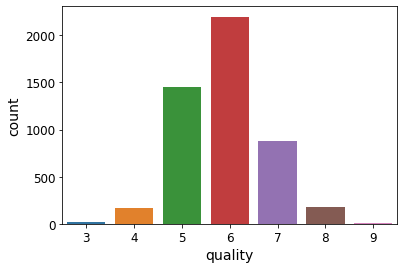

In [144]:
import seaborn as sns

sns.countplot(x = 'quality', data=df)

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [147]:
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)


In [149]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [150]:
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)


In [152]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [155]:

X.shape

(20640, 8)

In [157]:

EPOCHS = 150
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = X.shape[1]

In [158]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [159]:
class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)
    
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)

In [162]:
model = MultipleRegression(NUM_FEATURES)
# model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


MultipleRegression(
  (layer_1): Linear(in_features=8, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [163]:
loss_stats = {
    'train': [],
    "val": []
}

In [182]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [183]:

print("Begin training.")
for e in range(1, EPOCHS+1):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.reshape(-1,1))
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')


Begin training.
Epoch 001: | Train Loss: 0.27004 | Val Loss: 0.27463
Epoch 002: | Train Loss: 0.27258 | Val Loss: 0.27403
Epoch 003: | Train Loss: 0.27242 | Val Loss: 0.28404
Epoch 004: | Train Loss: 0.27391 | Val Loss: 0.27140
Epoch 005: | Train Loss: 0.27122 | Val Loss: 0.27429
Epoch 006: | Train Loss: 0.27422 | Val Loss: 0.27153
Epoch 007: | Train Loss: 0.27151 | Val Loss: 0.28154
Epoch 008: | Train Loss: 0.27450 | Val Loss: 0.27151
Epoch 009: | Train Loss: 0.27318 | Val Loss: 0.27539
Epoch 010: | Train Loss: 0.27632 | Val Loss: 0.28019
Epoch 011: | Train Loss: 0.27175 | Val Loss: 0.28250
Epoch 012: | Train Loss: 0.27237 | Val Loss: 0.27654
Epoch 013: | Train Loss: 0.26979 | Val Loss: 0.27511
Epoch 014: | Train Loss: 0.27320 | Val Loss: 0.30866
Epoch 015: | Train Loss: 0.27013 | Val Loss: 0.27371
Epoch 016: | Train Loss: 0.27013 | Val Loss: 0.27282
Epoch 017: | Train Loss: 0.27035 | Val Loss: 0.27947
Epoch 018: | Train Loss: 0.27470 | Val Loss: 0.27455
Epoch 019: | Train Loss: 0.270

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

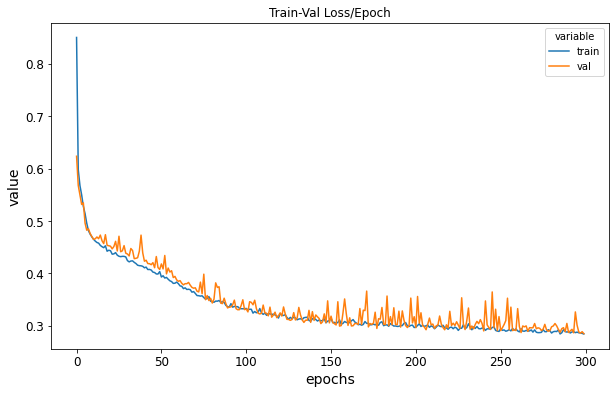

In [177]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(10,6))
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [172]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [174]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

Mean Squared Error : 0.326720388928874
R^2 : 0.7562674997305183
